(25718, 88)
       var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var5(t-10)  var6(t-10)  \
10       0.087928         0.0    0.000000    0.433333    0.545455    0.673469   
11       0.015545         0.0    0.021277    0.433333    0.545455    0.673469   
12       0.028905         0.0    0.042553    0.433333    0.545455    0.673469   
13       0.005587         0.0    0.063830    0.433333    0.545455    0.667639   
14       0.034005         0.0    0.085106    0.433333    0.545455    0.661808   
...           ...         ...         ...         ...         ...         ...   
25723    0.056352         1.0    0.702128    1.000000    1.000000    0.524781   
25724    0.050765         1.0    0.723404    1.000000    1.000000    0.518950   
25725    0.068496         1.0    0.744681    1.000000    1.000000    0.518950   
25726    0.042750         1.0    0.765957    1.000000    1.000000    0.518950   
25727    0.022589         1.0    0.787234    1.000000    1.000000    0.510204   

       var7(t-1

Epoch 51/200
556/556 - 5s - loss: 0.0191 - mape: 4373.1689 - val_loss: 0.0196 - val_mape: 5470.4946
Epoch 52/200
556/556 - 5s - loss: 0.0191 - mape: 4576.2646 - val_loss: 0.0192 - val_mape: 5042.9014
Epoch 53/200
556/556 - 5s - loss: 0.0191 - mape: 4415.0244 - val_loss: 0.0195 - val_mape: 5128.6240
Epoch 54/200
556/556 - 5s - loss: 0.0188 - mape: 4593.0913 - val_loss: 0.0204 - val_mape: 5128.8076
Epoch 55/200
556/556 - 5s - loss: 0.0189 - mape: 3865.4373 - val_loss: 0.0198 - val_mape: 5025.9102
Epoch 56/200
556/556 - 5s - loss: 0.0188 - mape: 4453.1152 - val_loss: 0.0202 - val_mape: 5143.0415
Epoch 57/200
556/556 - 4s - loss: 0.0189 - mape: 3620.2439 - val_loss: 0.0199 - val_mape: 5028.0376
Epoch 58/200
556/556 - 4s - loss: 0.0187 - mape: 4534.9878 - val_loss: 0.0195 - val_mape: 5200.0293
Epoch 59/200
556/556 - 5s - loss: 0.0187 - mape: 4204.3223 - val_loss: 0.0197 - val_mape: 5448.4067
Epoch 60/200
556/556 - 5s - loss: 0.0186 - mape: 4156.1768 - val_loss: 0.0194 - val_mape: 5111.7729


Epoch 133/200
556/556 - 5s - loss: 0.0165 - mape: 3961.6011 - val_loss: 0.0201 - val_mape: 4779.3521
Epoch 134/200
556/556 - 5s - loss: 0.0166 - mape: 4337.7168 - val_loss: 0.0202 - val_mape: 5294.9482
Epoch 135/200
556/556 - 5s - loss: 0.0165 - mape: 4308.2954 - val_loss: 0.0207 - val_mape: 5299.4395
Epoch 136/200
556/556 - 5s - loss: 0.0165 - mape: 4525.0347 - val_loss: 0.0203 - val_mape: 5152.7017
Epoch 137/200
556/556 - 5s - loss: 0.0165 - mape: 4480.2681 - val_loss: 0.0203 - val_mape: 5483.8604
Epoch 138/200
556/556 - 5s - loss: 0.0164 - mape: 4335.0063 - val_loss: 0.0200 - val_mape: 5376.4731
Epoch 139/200
556/556 - 5s - loss: 0.0163 - mape: 4038.1450 - val_loss: 0.0204 - val_mape: 5432.9238
Epoch 140/200
556/556 - 5s - loss: 0.0164 - mape: 4165.1987 - val_loss: 0.0200 - val_mape: 5139.1289
Epoch 141/200
556/556 - 5s - loss: 0.0163 - mape: 4426.8394 - val_loss: 0.0199 - val_mape: 5353.4629
Epoch 142/200
556/556 - 4s - loss: 0.0164 - mape: 4122.2544 - val_loss: 0.0200 - val_mape: 

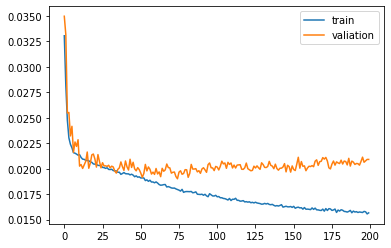

Test RMSE: 0.150
0.0707943
0.6953991


In [28]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from keras import layers
from keras import optimizers
from keras import callbacks

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('CER_1002.csv', header=0, index_col=0)
dataset = dataset.loc[:, ['Power', 'holidays', 'Hour', 'Days', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 10
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)
print(reframed)

# split into train and test sets
values = reframed.values
n_train_hours = 529 * 48 - 1
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(Dense(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Conv1D(filters = 48, kernel_size = 3, padding='same', 
                        activation='relu', kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.Conv1D(filters = 32, kernel_size = 3, padding='same', 
                        activation='relu', kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.Conv1D(filters = 16, kernel_size = 3, padding='same', 
                        activation='relu', kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.Dropout(0.3))
model.add(LSTM(174, return_sequences=True, activation="relu", kernel_initializer="uniform"))
model.add(LSTM(174, return_sequences=True, activation="relu", kernel_initializer="uniform"))
#model.add(LSTM(174, return_sequences=True, activation="relu", kernel_initializer="uniform"))
#model.add(LSTM(123, return_sequences=True, activation="relu", kernel_initializer="uniform"))
model.add(LSTM(174, return_sequences=False, activation="relu", kernel_initializer="uniform"))
#model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation='relu'))
optimizer = optimizers.Adam(learning_rate=0.0003)
model.compile(loss='mae', metrics=['mape'], optimizer=optimizer)
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=32, validation_split=0.3, 
                     verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='valiation')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print(mean_absolute_error(inv_y, inv_yhat))
print(mean_absolute_percentage_error(inv_y, inv_yhat))


In [27]:
import keras
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

def build_model(n_hidden=1, n_neurons=50, learning_rate=1e-1, input_shape=(train_X.shape[1], train_X.shape[2])):
    model = Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv1D(filters = 48, kernel_size = 3, padding='same', 
                            activation='relu', kernel_initializer ="glorot_uniform"))
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters = 32, kernel_size = 3, padding='same', 
                            activation='relu', kernel_initializer="glorot_uniform"))
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters = 16, kernel_size = 3, padding ='same', 
                            activation='relu', kernel_initializer="glorot_uniform"))
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Dropout(0.3))
    for layer in range(n_hidden):
        model.add(layers.LSTM(n_neurons, return_sequences=True, activation="relu", kernel_initializer="uniform"))
    #model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(1))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mape'])
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs= {
    "n_hidden": np.arange(1, 10).tolist(),
    "n_neurons": np.arange(1, 500).tolist(),
    "learning_rate": [3e-1, 3e-2, 3e-3, 3e-4, 3e-5, 3e-6],
}

checkpoint_cb = keras.callbacks.ModelCheckpoint('load_forecasting_New_best.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=5)
rnd_search_cv.fit(train_X, train_y, epochs=200, validation_split=0.3, shuffle=False, batch_size=64,
                  callbacks=[checkpoint_cb, early_stopping_cb])


print(rnd_search_cv.best_params_)
print('score:', rnd_search_cv.best_score_)

Epoch 1/200
223/223 [==============================] - 3s 6ms/step - loss: 0.0568 - mape: 175.1813 - val_loss: 0.0441 - val_mape: 91.1263
Epoch 2/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0552 - mape: 262.4468 - val_loss: 0.0425 - val_mape: 82.1531
Epoch 3/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0536 - mape: 350.7730 - val_loss: 0.0409 - val_mape: 73.9139
Epoch 4/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0520 - mape: 438.3636 - val_loss: 0.0395 - val_mape: 68.2834
Epoch 5/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0506 - mape: 523.9396 - val_loss: 0.0383 - val_mape: 65.4712
Epoch 6/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0494 - mape: 608.3530 - val_loss: 0.0373 - val_mape: 64.2286
Epoch 7/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0483 - mape: 692.2153 - val_loss: 0.0364 - val_mape: 64.2658
Epoch 8/200
223/223 [=============

223/223 [==============================] - 1s 5ms/step - loss: 0.0298 - mape: 1643.5876 - val_loss: 0.0322 - val_mape: 100.2929
Epoch 27/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0298 - mape: 1654.5001 - val_loss: 0.0322 - val_mape: 101.2008
Epoch 28/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0298 - mape: 1588.2151 - val_loss: 0.0322 - val_mape: 101.9897
Epoch 29/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0297 - mape: 1631.2442 - val_loss: 0.0322 - val_mape: 102.6041
Epoch 30/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0297 - mape: 1677.8636 - val_loss: 0.0322 - val_mape: 103.1567
Epoch 31/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0297 - mape: 1700.1049 - val_loss: 0.0322 - val_mape: 103.5771
Epoch 32/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0297 - mape: 1698.5790 - val_loss: 0.0322 - val_mape: 103.9553
Epoch 33/200
223/223 [====

223/223 [==============================] - 1s 6ms/step - loss: 0.0294 - mape: 1770.4804 - val_loss: 0.0320 - val_mape: 105.3601
Epoch 85/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0294 - mape: 1679.1219 - val_loss: 0.0320 - val_mape: 105.3558
Epoch 86/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0293 - mape: 1742.6836 - val_loss: 0.0320 - val_mape: 105.3677
Epoch 87/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0293 - mape: 1738.8402 - val_loss: 0.0320 - val_mape: 105.3853
Epoch 88/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0294 - mape: 1748.8901 - val_loss: 0.0320 - val_mape: 105.3294
Epoch 89/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0294 - mape: 1732.8717 - val_loss: 0.0320 - val_mape: 105.3042
Epoch 90/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0294 - mape: 1730.4239 - val_loss: 0.0320 - val_mape: 105.2608
Epoch 91/200
223/223 [====

Epoch 142/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0290 - mape: 1797.0773 - val_loss: 0.0314 - val_mape: 103.6838
Epoch 143/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0290 - mape: 1784.3335 - val_loss: 0.0313 - val_mape: 103.5918
Epoch 144/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0290 - mape: 1897.8775 - val_loss: 0.0313 - val_mape: 103.4714
Epoch 145/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0290 - mape: 1862.0178 - val_loss: 0.0313 - val_mape: 103.4053
Epoch 146/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0289 - mape: 1949.7923 - val_loss: 0.0313 - val_mape: 103.3559
Epoch 147/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0290 - mape: 1890.3094 - val_loss: 0.0313 - val_mape: 103.3646
Epoch 148/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0289 - mape: 1871.2786 - val_loss: 0.0312 - val_mape: 103.3632
Epoch 

Epoch 200/200
159/159 [==============================] - 0s 1ms/step - loss: 0.0396 - mape: 86.5002
Epoch 1/200
223/223 [==============================] - 5s 8ms/step - loss: 0.0474 - mape: 163.9696 - val_loss: 0.0443 - val_mape: 92.4305
Epoch 2/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0460 - mape: 237.3351 - val_loss: 0.0429 - val_mape: 84.7921
Epoch 3/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0447 - mape: 311.5311 - val_loss: 0.0416 - val_mape: 77.3104
Epoch 4/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0434 - mape: 385.2762 - val_loss: 0.0403 - val_mape: 71.2380
Epoch 5/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0421 - mape: 458.9595 - val_loss: 0.0392 - val_mape: 67.2669
Epoch 6/200
223/223 [==============================] - 1s 5ms/step - loss: 0.0411 - mape: 529.4785 - val_loss: 0.0382 - val_mape: 65.0192
Epoch 7/200
223/223 [==============================] - 1s 5ms/step - los

Epoch 24/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0304 - mape: 94.5994 - val_loss: 0.0324 - val_mape: 109.6902
Epoch 25/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0303 - mape: 96.4377 - val_loss: 0.0324 - val_mape: 112.0623
Epoch 26/200
223/223 [==============================] - 1s 4ms/step - loss: 0.0303 - mape: 98.1627 - val_loss: 0.0325 - val_mape: 113.9920
Epoch 27/200
223/223 [==============================] - 1s 7ms/step - loss: 0.0302 - mape: 99.5655 - val_loss: 0.0325 - val_mape: 115.5715
Epoch 28/200
223/223 [==============================] - 2s 7ms/step - loss: 0.0302 - mape: 100.7916 - val_loss: 0.0325 - val_mape: 116.9310
Epoch 29/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0302 - mape: 101.6892 - val_loss: 0.0325 - val_mape: 118.0769
Epoch 30/200
223/223 [==============================] - 1s 6ms/step - loss: 0.0302 - mape: 102.4137 - val_loss: 0.0325 - val_mape: 119.0508
Epoch 31/200
223/223 [==

223/223 [==============================] - 5s 22ms/step - loss: 0.0292 - mape: 1543.0168 - val_loss: 0.0321 - val_mape: 97.6101
Epoch 11/200
159/159 [==============================] - 1s 6ms/step - loss: 0.0415 - mape: 89.6762
Epoch 1/200
223/223 [==============================] - 14s 40ms/step - loss: 0.0314 - mape: 1503.8345 - val_loss: 0.0321 - val_mape: 99.6235
Epoch 2/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0297 - mape: 1579.7418 - val_loss: 0.0321 - val_mape: 97.6933
Epoch 3/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0297 - mape: 1593.1322 - val_loss: 0.0321 - val_mape: 97.4864
Epoch 4/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0297 - mape: 1587.9925 - val_loss: 0.0321 - val_mape: 97.8522
Epoch 5/200
223/223 [==============================] - 8s 37ms/step - loss: 0.0297 - mape: 1591.1430 - val_loss: 0.0321 - val_mape: 97.3619
Epoch 6/200
223/223 [==============================] - 8s 35ms/step - lo

223/223 [==============================] - 2s 10ms/step - loss: 0.0292 - mape: 1542.3809 - val_loss: 0.0321 - val_mape: 97.4925
Epoch 5/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0292 - mape: 1539.5146 - val_loss: 0.0321 - val_mape: 97.5252
Epoch 6/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0292 - mape: 1543.5124 - val_loss: 0.0321 - val_mape: 98.6921
Epoch 7/200
223/223 [==============================] - 2s 8ms/step - loss: 0.0292 - mape: 1542.8626 - val_loss: 0.0321 - val_mape: 97.5774
Epoch 8/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0292 - mape: 1538.6162 - val_loss: 0.0321 - val_mape: 97.1255
Epoch 9/200
223/223 [==============================] - 2s 9ms/step - loss: 0.0292 - mape: 1541.5204 - val_loss: 0.0321 - val_mape: 98.2219
Epoch 10/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0292 - mape: 1539.8743 - val_loss: 0.0321 - val_mape: 97.7316
Epoch 11/200
223/223 [===========

223/223 [==============================] - 4s 11ms/step - loss: 0.0425 - mape: 1614.1592 - val_loss: 0.0313 - val_mape: 93.5940
Epoch 2/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0352 - mape: 2609.1867 - val_loss: 0.0264 - val_mape: 105.3977
Epoch 3/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0306 - mape: 2844.3275 - val_loss: 0.0243 - val_mape: 103.3617
Epoch 4/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0282 - mape: 2704.4343 - val_loss: 0.0258 - val_mape: 105.4357
Epoch 5/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0268 - mape: 2739.0774 - val_loss: 0.0219 - val_mape: 92.1770
Epoch 6/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0261 - mape: 2462.8354 - val_loss: 0.0256 - val_mape: 110.7606
Epoch 7/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0274 - mape: 2315.3056 - val_loss: 0.0223 - val_mape: 92.8007
Epoch 8/200
223/223 [=======

223/223 [==============================] - 2s 11ms/step - loss: 0.0239 - mape: 2867.1094 - val_loss: 0.0328 - val_mape: 148.0794
Epoch 6/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0231 - mape: 2689.8918 - val_loss: 0.0354 - val_mape: 164.6504
Epoch 7/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0227 - mape: 2196.0870 - val_loss: 0.0292 - val_mape: 125.1226
Epoch 8/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0224 - mape: 2365.6132 - val_loss: 0.0340 - val_mape: 148.2703
Epoch 9/200
223/223 [==============================] - 3s 11ms/step - loss: 0.0222 - mape: 2536.8855 - val_loss: 0.0280 - val_mape: 121.9339
Epoch 10/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0219 - mape: 2222.3491 - val_loss: 0.0259 - val_mape: 111.7406
Epoch 11/200
223/223 [==============================] - 2s 11ms/step - loss: 0.0216 - mape: 2311.9487 - val_loss: 0.0221 - val_mape: 91.8334
Epoch 12/200
223/223 [==

Epoch 10/200
223/223 [==============================] - 2s 9ms/step - loss: 0.0220 - mape: 87.1273 - val_loss: 0.0243 - val_mape: 104.2006
Epoch 11/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0214 - mape: 86.8738 - val_loss: 0.0242 - val_mape: 105.4842
Epoch 12/200
223/223 [==============================] - 2s 9ms/step - loss: 0.0210 - mape: 84.7348 - val_loss: 0.0234 - val_mape: 103.8522
Epoch 13/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0210 - mape: 84.3170 - val_loss: 0.0232 - val_mape: 105.1484
Epoch 14/200
223/223 [==============================] - 2s 9ms/step - loss: 0.0208 - mape: 83.8728 - val_loss: 0.0225 - val_mape: 102.4325
Epoch 15/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0209 - mape: 84.8313 - val_loss: 0.0218 - val_mape: 91.2087
Epoch 16/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0206 - mape: 83.5487 - val_loss: 0.0235 - val_mape: 112.5024
Epoch 17/200
223/223 [==

223/223 [==============================] - 2s 10ms/step - loss: 0.0245 - mape: 99.7039 - val_loss: 0.0366 - val_mape: 39509.5703
Epoch 6/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0242 - mape: 97.4343 - val_loss: 0.0337 - val_mape: 36371.5586
Epoch 7/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0233 - mape: 94.2173 - val_loss: 0.0331 - val_mape: 35422.7656
Epoch 8/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0224 - mape: 91.1142 - val_loss: 0.0316 - val_mape: 31452.3301
Epoch 9/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0218 - mape: 88.9866 - val_loss: 0.0313 - val_mape: 32544.2969
Epoch 10/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0213 - mape: 86.5627 - val_loss: 0.0313 - val_mape: 29726.2461
Epoch 11/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0216 - mape: 86.6685 - val_loss: 0.0319 - val_mape: 33491.1836
Epoch 12/200
223/223 [=

Epoch 10/200
223/223 [==============================] - 3s 12ms/step - loss: 0.0404 - mape: 3508.7942 - val_loss: 0.0357 - val_mape: 200.6079
Epoch 11/200
223/223 [==============================] - 3s 12ms/step - loss: 0.0491 - mape: 3403.3857 - val_loss: 0.0331 - val_mape: 151.0768
Epoch 12/200
223/223 [==============================] - 3s 12ms/step - loss: 0.0499 - mape: 2849.0657 - val_loss: 0.0382 - val_mape: 64.5955
Epoch 13/200
223/223 [==============================] - 3s 12ms/step - loss: 0.0440 - mape: 3350.2433 - val_loss: 0.0370 - val_mape: 63.5087
Epoch 14/200
223/223 [==============================] - 3s 12ms/step - loss: 0.0439 - mape: 2062.8502 - val_loss: 0.0334 - val_mape: 158.8431
Epoch 15/200
223/223 [==============================] - 3s 12ms/step - loss: 0.0498 - mape: 3292.6563 - val_loss: 0.0539 - val_mape: 146.2612
Epoch 16/200
223/223 [==============================] - 3s 12ms/step - loss: 0.0573 - mape: 3701.0540 - val_loss: 0.0396 - val_mape: 68.2722
Epoch 17/

223/223 [==============================] - 4s 17ms/step - loss: 0.0382 - mape: 1580.9091 - val_loss: 0.0322 - val_mape: 88.9778
Epoch 4/200
223/223 [==============================] - 6s 25ms/step - loss: 0.0382 - mape: 1571.5857 - val_loss: 0.0322 - val_mape: 88.5560
Epoch 5/200
223/223 [==============================] - 5s 22ms/step - loss: 0.0383 - mape: 1559.5699 - val_loss: 0.0322 - val_mape: 87.5782
Epoch 6/200
223/223 [==============================] - 6s 25ms/step - loss: 0.0384 - mape: 1542.3882 - val_loss: 0.0322 - val_mape: 87.0295
Epoch 7/200
223/223 [==============================] - 6s 25ms/step - loss: 0.0384 - mape: 1534.2232 - val_loss: 0.0322 - val_mape: 86.8208
Epoch 8/200
223/223 [==============================] - 6s 26ms/step - loss: 0.0385 - mape: 1536.1605 - val_loss: 0.0322 - val_mape: 86.5223
Epoch 9/200
223/223 [==============================] - 6s 26ms/step - loss: 0.0385 - mape: 1527.4721 - val_loss: 0.0322 - val_mape: 86.5309
Epoch 10/200
223/223 [==========

Epoch 24/200
223/223 [==============================] - 5s 23ms/step - loss: 0.0294 - mape: 104.8288 - val_loss: 0.0322 - val_mape: 96.9697
Epoch 25/200
223/223 [==============================] - 5s 24ms/step - loss: 0.0294 - mape: 104.7090 - val_loss: 0.0322 - val_mape: 97.7011
Epoch 26/200
223/223 [==============================] - 5s 24ms/step - loss: 0.0294 - mape: 104.6932 - val_loss: 0.0322 - val_mape: 98.4636
Epoch 27/200
223/223 [==============================] - 5s 24ms/step - loss: 0.0294 - mape: 104.8577 - val_loss: 0.0322 - val_mape: 99.2834
Epoch 28/200
223/223 [==============================] - 5s 23ms/step - loss: 0.0294 - mape: 104.8975 - val_loss: 0.0322 - val_mape: 99.7005
Epoch 29/200
223/223 [==============================] - 5s 23ms/step - loss: 0.0293 - mape: 104.9530 - val_loss: 0.0322 - val_mape: 100.3541
Epoch 30/200
223/223 [==============================] - 5s 24ms/step - loss: 0.0293 - mape: 104.9847 - val_loss: 0.0322 - val_mape: 100.8714
Epoch 31/200
223/2

Epoch 19/200
223/223 [==============================] - 9s 40ms/step - loss: 0.0297 - mape: 1849.7998 - val_loss: 0.0246 - val_mape: 82.0415
Epoch 20/200
223/223 [==============================] - 8s 38ms/step - loss: 0.0297 - mape: 2434.3911 - val_loss: 0.0243 - val_mape: 81.6040
Epoch 21/200
223/223 [==============================] - 9s 40ms/step - loss: 0.0290 - mape: 2237.0014 - val_loss: 0.0239 - val_mape: 81.5418
Epoch 22/200
223/223 [==============================] - 9s 40ms/step - loss: 0.0286 - mape: 2871.2566 - val_loss: 0.0238 - val_mape: 79.3591
Epoch 23/200
223/223 [==============================] - 9s 38ms/step - loss: 0.0283 - mape: 2531.8827 - val_loss: 0.0236 - val_mape: 78.3864
Epoch 24/200
223/223 [==============================] - 9s 40ms/step - loss: 0.0281 - mape: 2151.1746 - val_loss: 0.0234 - val_mape: 76.8111
Epoch 25/200
223/223 [==============================] - 9s 40ms/step - loss: 0.0279 - mape: 2379.7446 - val_loss: 0.0230 - val_mape: 77.4714
Epoch 26/200


223/223 [==============================] - 8s 35ms/step - loss: 0.0243 - mape: 2261.1254 - val_loss: 0.0237 - val_mape: 76.9664
Epoch 24/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0240 - mape: 2655.8743 - val_loss: 0.0233 - val_mape: 75.8277
Epoch 25/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0238 - mape: 2206.0684 - val_loss: 0.0230 - val_mape: 74.6298
Epoch 26/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0236 - mape: 2224.3110 - val_loss: 0.0227 - val_mape: 73.5095
Epoch 27/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0233 - mape: 2234.0988 - val_loss: 0.0225 - val_mape: 71.5548
Epoch 28/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0232 - mape: 2853.6888 - val_loss: 0.0221 - val_mape: 72.5864
Epoch 29/200
223/223 [==============================] - 8s 37ms/step - loss: 0.0230 - mape: 2269.9416 - val_loss: 0.0217 - val_mape: 73.5312
Epoch 30/200
223/223 [====

223/223 [==============================] - 8s 36ms/step - loss: 0.0242 - mape: 2164.3749 - val_loss: 0.0234 - val_mape: 85.9034
Epoch 27/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0242 - mape: 2404.3834 - val_loss: 0.0232 - val_mape: 81.9999
Epoch 28/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0241 - mape: 1982.5618 - val_loss: 0.0230 - val_mape: 79.9960
Epoch 29/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0238 - mape: 2441.6135 - val_loss: 0.0228 - val_mape: 78.9139
Epoch 30/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0235 - mape: 2312.5486 - val_loss: 0.0226 - val_mape: 81.4477
Epoch 31/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0235 - mape: 2672.5402 - val_loss: 0.0224 - val_mape: 79.9734
Epoch 32/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0233 - mape: 2496.3344 - val_loss: 0.0222 - val_mape: 82.0909
Epoch 33/200
223/223 [====

223/223 [==============================] - 8s 35ms/step - loss: 0.0213 - mape: 1806.2790 - val_loss: 0.0197 - val_mape: 64.8173
Epoch 85/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0214 - mape: 1777.1395 - val_loss: 0.0196 - val_mape: 65.3571
Epoch 86/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0212 - mape: 2041.7954 - val_loss: 0.0198 - val_mape: 64.4648
Epoch 87/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0213 - mape: 2044.2695 - val_loss: 0.0202 - val_mape: 62.9520
Epoch 88/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0211 - mape: 2126.8654 - val_loss: 0.0194 - val_mape: 65.2204
Epoch 89/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0211 - mape: 2144.8396 - val_loss: 0.0197 - val_mape: 64.5339
Epoch 90/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0212 - mape: 2037.0179 - val_loss: 0.0197 - val_mape: 64.1367
Epoch 91/200
223/223 [====

Epoch 32/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0229 - mape: 91.8926 - val_loss: 0.0258 - val_mape: 68.8939
Epoch 33/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0228 - mape: 91.3613 - val_loss: 0.0262 - val_mape: 68.1162
Epoch 34/200
223/223 [==============================] - 8s 36ms/step - loss: 0.0228 - mape: 90.6878 - val_loss: 0.0262 - val_mape: 67.2733
Epoch 35/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0227 - mape: 90.9435 - val_loss: 0.0256 - val_mape: 67.6755
Epoch 36/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0226 - mape: 90.6031 - val_loss: 0.0259 - val_mape: 66.3497
Epoch 37/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0224 - mape: 89.6999 - val_loss: 0.0253 - val_mape: 66.2556
Epoch 38/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0223 - mape: 88.9765 - val_loss: 0.0254 - val_mape: 66.4367
Epoch 39/200
223/223 [=====

Epoch 21/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0253 - mape: 102.0900 - val_loss: 0.0377 - val_mape: 27435.3496
Epoch 22/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0253 - mape: 101.1187 - val_loss: 0.0377 - val_mape: 27277.6504
Epoch 23/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0252 - mape: 100.4390 - val_loss: 0.0376 - val_mape: 27482.7285
Epoch 24/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0250 - mape: 100.8035 - val_loss: 0.0375 - val_mape: 27100.0645
Epoch 25/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0248 - mape: 99.8581 - val_loss: 0.0373 - val_mape: 27220.5996
Epoch 26/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0247 - mape: 99.3732 - val_loss: 0.0370 - val_mape: 27994.8438
Epoch 27/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0246 - mape: 99.4300 - val_loss: 0.0371 - val_mape: 27050.2793
Ep

Epoch 79/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0209 - mape: 83.9197 - val_loss: 0.0323 - val_mape: 23037.0078
Epoch 80/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0208 - mape: 83.0453 - val_loss: 0.0328 - val_mape: 21916.5332
Epoch 81/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0208 - mape: 83.4403 - val_loss: 0.0321 - val_mape: 23404.5938
Epoch 82/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0208 - mape: 84.2658 - val_loss: 0.0324 - val_mape: 22812.8379
Epoch 83/200
223/223 [==============================] - 8s 35ms/step - loss: 0.0209 - mape: 85.0340 - val_loss: 0.0322 - val_mape: 23174.0918
Epoch 84/200
159/159 [==============================] - 1s 8ms/step - loss: 0.0209 - mape: 68.8410
Epoch 1/200
223/223 [==============================] - 8s 20ms/step - loss: 0.0436 - mape: 1609.0875 - val_loss: 0.0323 - val_mape: 87.8193
Epoch 2/200
223/223 [==============================

Epoch 14/200
223/223 [==============================] - 4s 17ms/step - loss: 0.0294 - mape: 105.0636 - val_loss: 0.0323 - val_mape: 94.3957
Epoch 15/200
223/223 [==============================] - 4s 17ms/step - loss: 0.0294 - mape: 104.7843 - val_loss: 0.0324 - val_mape: 89.5108
Epoch 16/200
223/223 [==============================] - 4s 17ms/step - loss: 0.0295 - mape: 105.2278 - val_loss: 0.0323 - val_mape: 93.4790
Epoch 17/200
223/223 [==============================] - 4s 17ms/step - loss: 0.0294 - mape: 105.0648 - val_loss: 0.0323 - val_mape: 94.2305
Epoch 18/200
223/223 [==============================] - 4s 17ms/step - loss: 0.0294 - mape: 104.9636 - val_loss: 0.0323 - val_mape: 95.0712
Epoch 19/200
223/223 [==============================] - 4s 17ms/step - loss: 0.0294 - mape: 104.9068 - val_loss: 0.0322 - val_mape: 95.5374
Epoch 20/200
223/223 [==============================] - 4s 17ms/step - loss: 0.0294 - mape: 104.8194 - val_loss: 0.0322 - val_mape: 96.0309
Epoch 21/200
223/223

223/223 [==============================] - 5s 21ms/step - loss: 0.0292 - mape: 1544.0158 - val_loss: 0.0321 - val_mape: 97.3416
Epoch 4/200
223/223 [==============================] - 5s 22ms/step - loss: 0.0292 - mape: 1540.4616 - val_loss: 0.0321 - val_mape: 97.0597
Epoch 5/200
223/223 [==============================] - 5s 21ms/step - loss: 0.0292 - mape: 1537.9897 - val_loss: 0.0321 - val_mape: 97.0666
Epoch 6/200
223/223 [==============================] - 5s 22ms/step - loss: 0.0292 - mape: 1543.8996 - val_loss: 0.0321 - val_mape: 98.0215
Epoch 7/200
223/223 [==============================] - 5s 21ms/step - loss: 0.0292 - mape: 1541.4978 - val_loss: 0.0321 - val_mape: 97.6278
Epoch 8/200
223/223 [==============================] - 5s 21ms/step - loss: 0.0292 - mape: 1537.8219 - val_loss: 0.0321 - val_mape: 97.5301
Epoch 9/200
223/223 [==============================] - 5s 21ms/step - loss: 0.0292 - mape: 1541.7921 - val_loss: 0.0321 - val_mape: 97.4425
Epoch 10/200
223/223 [==========

Epoch 2/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0546 - mape: 309.2283 - val_loss: 0.0416 - val_mape: 77.2050
Epoch 3/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0525 - mape: 425.0674 - val_loss: 0.0396 - val_mape: 68.9223
Epoch 4/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0507 - mape: 536.2799 - val_loss: 0.0381 - val_mape: 65.3413
Epoch 5/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0491 - mape: 644.8108 - val_loss: 0.0369 - val_mape: 64.3108
Epoch 6/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0478 - mape: 751.5003 - val_loss: 0.0358 - val_mape: 65.0818
Epoch 7/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0465 - mape: 856.7918 - val_loss: 0.0350 - val_mape: 66.9449
Epoch 8/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0454 - mape: 958.8437 - val_loss: 0.0342 - val_mape: 69.6594
Epoch 9/200
223/223 [======

223/223 [==============================] - 2s 10ms/step - loss: 0.0298 - mape: 1687.0247 - val_loss: 0.0324 - val_mape: 104.6480
Epoch 30/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0298 - mape: 1689.3931 - val_loss: 0.0323 - val_mape: 104.7651
Epoch 31/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0298 - mape: 1691.4514 - val_loss: 0.0323 - val_mape: 104.8745
Epoch 32/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0298 - mape: 1693.0836 - val_loss: 0.0323 - val_mape: 104.9572
Epoch 33/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0298 - mape: 1694.2694 - val_loss: 0.0323 - val_mape: 105.0191
Epoch 34/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0298 - mape: 1695.1563 - val_loss: 0.0323 - val_mape: 105.0535
Epoch 35/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0298 - mape: 1696.1776 - val_loss: 0.0323 - val_mape: 105.0964
Epoch 36/200
223/22

Epoch 87/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0296 - mape: 1694.1565 - val_loss: 0.0322 - val_mape: 104.4889
Epoch 88/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0296 - mape: 1693.9807 - val_loss: 0.0322 - val_mape: 104.4722
Epoch 89/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0296 - mape: 1693.8362 - val_loss: 0.0322 - val_mape: 104.4555
Epoch 90/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0296 - mape: 1693.7813 - val_loss: 0.0322 - val_mape: 104.4467
Epoch 91/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0296 - mape: 1693.6620 - val_loss: 0.0322 - val_mape: 104.4369
Epoch 92/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0296 - mape: 1693.5956 - val_loss: 0.0322 - val_mape: 104.4286
Epoch 93/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0296 - mape: 1693.4928 - val_loss: 0.0322 - val_mape: 104.4196
Epoch 

223/223 [==============================] - 2s 10ms/step - loss: 0.0295 - mape: 1681.9410 - val_loss: 0.0322 - val_mape: 103.5399
Epoch 145/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0295 - mape: 1681.7683 - val_loss: 0.0322 - val_mape: 103.5263
Epoch 146/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0295 - mape: 1681.6165 - val_loss: 0.0322 - val_mape: 103.5154
Epoch 147/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0295 - mape: 1681.4834 - val_loss: 0.0322 - val_mape: 103.5028
Epoch 148/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0295 - mape: 1681.4983 - val_loss: 0.0322 - val_mape: 103.5021
Epoch 149/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0295 - mape: 1681.5873 - val_loss: 0.0321 - val_mape: 103.4975
Epoch 150/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0295 - mape: 1681.7249 - val_loss: 0.0321 - val_mape: 103.5135
Epoch 151/200

159/159 [==============================] - 0s 2ms/step - loss: 0.0412 - mape: 91.7867
Epoch 1/200
223/223 [==============================] - 6s 12ms/step - loss: 0.0473 - mape: 191.5218 - val_loss: 0.0437 - val_mape: 89.1341
Epoch 2/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0453 - mape: 300.0169 - val_loss: 0.0417 - val_mape: 78.0430
Epoch 3/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0433 - mape: 409.0652 - val_loss: 0.0399 - val_mape: 69.6820
Epoch 4/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0416 - mape: 519.4306 - val_loss: 0.0383 - val_mape: 65.7077
Epoch 5/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0400 - mape: 630.0033 - val_loss: 0.0370 - val_mape: 64.2973
Epoch 6/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0386 - mape: 740.5307 - val_loss: 0.0359 - val_mape: 64.9133
Epoch 7/200
223/223 [==============================] - 2s 10ms/step - loss: 0.03

223/223 [==============================] - 2s 10ms/step - loss: 0.0437 - mape: 81.3284 - val_loss: 0.0491 - val_mape: 5212.4189
Epoch 4/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0421 - mape: 76.0845 - val_loss: 0.0475 - val_mape: 6852.0664
Epoch 5/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0407 - mape: 73.1933 - val_loss: 0.0462 - val_mape: 8453.2295
Epoch 6/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0394 - mape: 71.6614 - val_loss: 0.0451 - val_mape: 10058.7578
Epoch 7/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0382 - mape: 70.9313 - val_loss: 0.0441 - val_mape: 11663.7871
Epoch 8/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0371 - mape: 70.9064 - val_loss: 0.0432 - val_mape: 13268.5195
Epoch 9/200
223/223 [==============================] - 2s 10ms/step - loss: 0.0360 - mape: 71.4856 - val_loss: 0.0426 - val_mape: 14850.4902
Epoch 10/200
223/223 [======

278/278 [==============================] - 3s 9ms/step - loss: 0.0203 - mape: 433.3241 - val_loss: 0.0211 - val_mape: 4667.6929
Epoch 36/200
278/278 [==============================] - 2s 9ms/step - loss: 0.0203 - mape: 436.0148 - val_loss: 0.0210 - val_mape: 4245.3618
Epoch 37/200
278/278 [==============================] - 2s 9ms/step - loss: 0.0204 - mape: 484.7261 - val_loss: 0.0209 - val_mape: 4295.2705
Epoch 38/200
278/278 [==============================] - 2s 9ms/step - loss: 0.0201 - mape: 412.3691 - val_loss: 0.0210 - val_mape: 4251.1855
Epoch 39/200
278/278 [==============================] - 2s 9ms/step - loss: 0.0202 - mape: 352.3667 - val_loss: 0.0209 - val_mape: 4193.7749
Epoch 40/200
278/278 [==============================] - 2s 9ms/step - loss: 0.0200 - mape: 396.6330 - val_loss: 0.0210 - val_mape: 4359.1562
{'n_neurons': 174, 'n_hidden': 3, 'learning_rate': 0.0003}
score: -0.023978834599256517


Epoch 1/100
263/263 - 8s - loss: 0.0438 - mse: 0.0053 - val_loss: 0.0365 - val_mse: 0.0072
Epoch 2/100
263/263 - 3s - loss: 0.0360 - mse: 0.0040 - val_loss: 0.0362 - val_mse: 0.0066
Epoch 3/100
263/263 - 3s - loss: 0.0348 - mse: 0.0038 - val_loss: 0.0364 - val_mse: 0.0065
Epoch 4/100
263/263 - 3s - loss: 0.0345 - mse: 0.0037 - val_loss: 0.0360 - val_mse: 0.0064
Epoch 5/100
263/263 - 2s - loss: 0.0334 - mse: 0.0035 - val_loss: 0.0342 - val_mse: 0.0064
Epoch 6/100
263/263 - 3s - loss: 0.0318 - mse: 0.0034 - val_loss: 0.0329 - val_mse: 0.0064
Epoch 7/100
263/263 - 3s - loss: 0.0313 - mse: 0.0034 - val_loss: 0.0323 - val_mse: 0.0063
Epoch 8/100
263/263 - 2s - loss: 0.0310 - mse: 0.0033 - val_loss: 0.0319 - val_mse: 0.0062
Epoch 9/100
263/263 - 3s - loss: 0.0308 - mse: 0.0033 - val_loss: 0.0318 - val_mse: 0.0062
Epoch 10/100
263/263 - 3s - loss: 0.0307 - mse: 0.0033 - val_loss: 0.0314 - val_mse: 0.0061
Epoch 11/100
263/263 - 3s - loss: 0.0304 - mse: 0.0032 - val_loss: 0.0312 - val_mse: 0.00

Epoch 91/100
263/263 - 2s - loss: 0.0211 - mse: 0.0018 - val_loss: 0.0229 - val_mse: 0.0037
Epoch 92/100
263/263 - 2s - loss: 0.0210 - mse: 0.0018 - val_loss: 0.0229 - val_mse: 0.0037
Epoch 93/100
263/263 - 2s - loss: 0.0211 - mse: 0.0018 - val_loss: 0.0232 - val_mse: 0.0038
Epoch 94/100
263/263 - 2s - loss: 0.0211 - mse: 0.0018 - val_loss: 0.0233 - val_mse: 0.0037
Epoch 95/100
263/263 - 2s - loss: 0.0210 - mse: 0.0018 - val_loss: 0.0234 - val_mse: 0.0038
Epoch 96/100
263/263 - 2s - loss: 0.0210 - mse: 0.0018 - val_loss: 0.0231 - val_mse: 0.0037
Epoch 97/100
263/263 - 2s - loss: 0.0210 - mse: 0.0018 - val_loss: 0.0232 - val_mse: 0.0038
Epoch 98/100
263/263 - 2s - loss: 0.0210 - mse: 0.0018 - val_loss: 0.0231 - val_mse: 0.0038
Epoch 99/100
263/263 - 2s - loss: 0.0210 - mse: 0.0018 - val_loss: 0.0231 - val_mse: 0.0038
Epoch 100/100
263/263 - 2s - loss: 0.0210 - mse: 0.0018 - val_loss: 0.0228 - val_mse: 0.0037


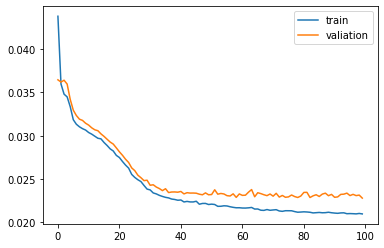

ValueError: in user code:

    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 48)


In [5]:
'''
{'n_neurons': 123, 'n_hidden': 5, 'learning_rate': 3e-05} n_hours = 6
score: -0.022615093365311624
'''
# design network
model = Sequential()
model.add(Dense(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Conv1D(filters = 48, kernel_size = 3, padding='same', 
                        activation='relu', kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.Conv1D(filters = 32, kernel_size = 3, padding='same', 
                        activation='relu', kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.Conv1D(filters = 16, kernel_size = 3, padding='same', 
                        activation='relu', kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.Dropout(0.3))
model.add(LSTM(123, return_sequences=True, activation="relu", kernel_initializer="uniform"))
model.add(LSTM(123, return_sequences=True, activation="relu", kernel_initializer="uniform"))
model.add(LSTM(123, return_sequences=True, activation="relu", kernel_initializer="uniform"))
model.add(LSTM(123, return_sequences=True, activation="relu", kernel_initializer="uniform"))
model.add(LSTM(123, return_sequences=False, activation="relu", kernel_initializer="uniform"))
#model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation='relu'))
optimizer = optimizers.Adam(learning_rate=3e-05)
model.compile(loss='mae', metrics=['mse'], optimizer=optimizer)
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_split=0.3, 
                     verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='valiation')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print(mean_absolute_error(inv_y, inv_yhat))
print(mean_absolute_percentage_error(inv_y, inv_yhat))